## S-Mobile: Predicting Customer Churn

* Team-lead GitHub userid: rsm-xyz123
* Group name: Group_29
* Team member names:
    - Oak Sirirutchaneegorn
    - Khushi Bet
    - Lakshay Chopra
    - Jiya Bhaskar

![](images/github-group-workflow.png)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pyrsm as rsm
rsm.__version__ # should be 0.9.20 or newer

'0.9.20'

In [8]:
## load the data - this dataset must NOT be changed
s_mobile = pd.read_parquet("data/s_mobile.parquet")

In [4]:
rsm.md("data/s_mobile_description.md")

## S-mobile

Dataset used to investigate opportunities to decrease customer churn at S-mobile. The sample consists of three parts:

1. A training sample with 27,300 observations and a 50% churn rate ("training == 1")
2. A test sample with 11,700 observations and a 50% churn rate ("training == 0")
3. A representative sample with 30,000 observations and a churn rate of 2%, i.e., the actual monthly churn rate for S-mobile ("is.na(training)" or "representative == 1")

## Variables

* customer: Customer ID
* churn: Did consumer churn in the last 30 days? (yes or no)
* changer: % change in revenue over the most recent 4 month period
* changem: % change in minutes of use over the most recent 4 month period
* revenue: Mean monthly revenue in SGD
* mou: Mean monthly minutes of use
* overage: Mean monthly overage minutes
* roam: Mean number of roaming calls
* conference: Mean number of conference calls
* months: # of months the customer has had service with S-Mobile
* uniqsubs: Number of individuals listed on the customer account
* custcare: Mean number of calls to customer care 
* retcalls: Number of calls by the customer to the retention team
* dropvce: Mean number of dropped voice calls 
* eqpdays: Number of days customer has owned current handset
* refurb: Handset is refurbished (no or yes)
* smartphone: Handset is a smartphone (no or yes)
* creditr: High credit rating as opposed to medium or low (no or yes)
* mcycle: Subscriber owns a motorcycle (no or yes)
* car: Subscriber owns a car (no or yes)
* travel: Subscriber has traveled internationally (no or yes)
* region: Regions delineated by the 5 Community Development Council Districts (e.g., CS is Central Singapore)
* occupation: Categorical variable with 4 occupation levels (professional, student, retired, or other)
* training: 1 for training sample, 0 for test sample, NA for representative sample
* representative: 1 for representative sample, 0 for training and test sample


If you want access to the full 1M row dataset, use the code below to download and use the data. Please do **not** include the 1M row dataset in your repo!

The downside to using the dataset with 1M rows is, of course, that estimation time will increase substantially. I do NOT recommend you use this dataset to select your final model or for tuning hyper parameters. You can, however, use this larger dataset to re-estimate your chosen model and generate profit estimates for the representative sample.

In [9]:
s_mobile_1M = pd.read_parquet("https://www.dropbox.com/scl/fi/upm68ytk5r7oz2xd61qau/s_mobile_1M.parquet?rlkey=0pap46l024yryr4h08mvexiha&dl=1")
s_mobile_1M

,customer,churn,changer,changem,revenue,mou,overage,roam,conference,months,...,refurb,smartphone,highcreditr,mcycle,car,travel,region,occupation,training,representative
0,U88927415,no,-1,-8,31,118,1,0,0,38,...,no,yes,no,no,no,no,SW,other,0.0,0
1,U94655060,no,0,-2,87,412,104,0,0,10,...,no,yes,no,no,no,yes,CS,student,1.0,0
2,U22910834,no,1,23,138,1252,0,3,0,19,...,no,yes,no,no,no,no,SE,student,1.0,0
3,U55939985,no,-1,-15,58,69,42,3,0,8,...,no,yes,yes,no,no,no,NE,other,NaN,1
4,U74897690,no,-9,-20,117,1002,175,4,0,11,...,yes,yes,no,no,no,no,SE,other,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004995,U63357590,no,2,34,54,778,115,1,1,7,...,no,yes,no,no,no,no,NW,other,0.0,0
1004996,U10548621,no,-5,-20,31,176,40,3,0,35,...,no,no,no,no,no,no,CS,retired,1.0,0
1004997,U61718563,no,-3,-2,45,1731,105,0,0,30,...,no,yes,no,no,no,no,SW,other,1.0,0
1004998,U79998923,no,73,46,108,1156,144,18,0,18,...,no,yes,no,no,no,no,CS,other,0.0,0


## Question answers

### Performing EDA

In [8]:
s_mobile.describe().T

,count,mean,std,min,25%,50%,75%,max
changer,69000.0,8.596870,28.967754,-90.0,-2.0,0.0,4.0,437.0
changem,69000.0,16.041449,51.427097,-78.0,-9.0,-1.0,27.0,540.0
revenue,69000.0,56.959203,43.439200,0.0,32.0,46.0,69.0,1223.0
mou,69000.0,525.822290,530.024730,0.0,159.0,366.0,722.0,7668.0
overage,69000.0,64.076725,68.671857,0.0,0.0,40.0,127.0,283.0
roam,69000.0,1.195493,9.083502,0.0,0.0,0.0,0.0,1112.0
conference,69000.0,0.276275,1.173325,0.0,0.0,0.0,0.0,66.0
months,69000.0,18.696507,9.729616,6.0,11.0,16.0,24.0,61.0
uniqsubs,69000.0,1.526203,0.866405,1.0,1.0,1.0,2.0,18.0
custcare,69000.0,2.377652,4.253015,0.0,0.0,0.0,3.0,32.0


In [9]:
s_mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69000 entries, 0 to 68999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   customer        69000 non-null  object  
 1   churn           69000 non-null  category
 2   changer         69000 non-null  int32   
 3   changem         69000 non-null  int32   
 4   revenue         69000 non-null  int32   
 5   mou             69000 non-null  int32   
 6   overage         69000 non-null  int32   
 7   roam            69000 non-null  int32   
 8   conference      69000 non-null  int32   
 9   months          69000 non-null  int32   
 10  uniqsubs        69000 non-null  int32   
 11  custcare        69000 non-null  int32   
 12  retcalls        69000 non-null  float64 
 13  dropvce         69000 non-null  int32   
 14  eqpdays         69000 non-null  float64 
 15  refurb          69000 non-null  category
 16  smartphone      69000 non-null  category
 17  highcreditr 

No plot will be created for customer (type object)


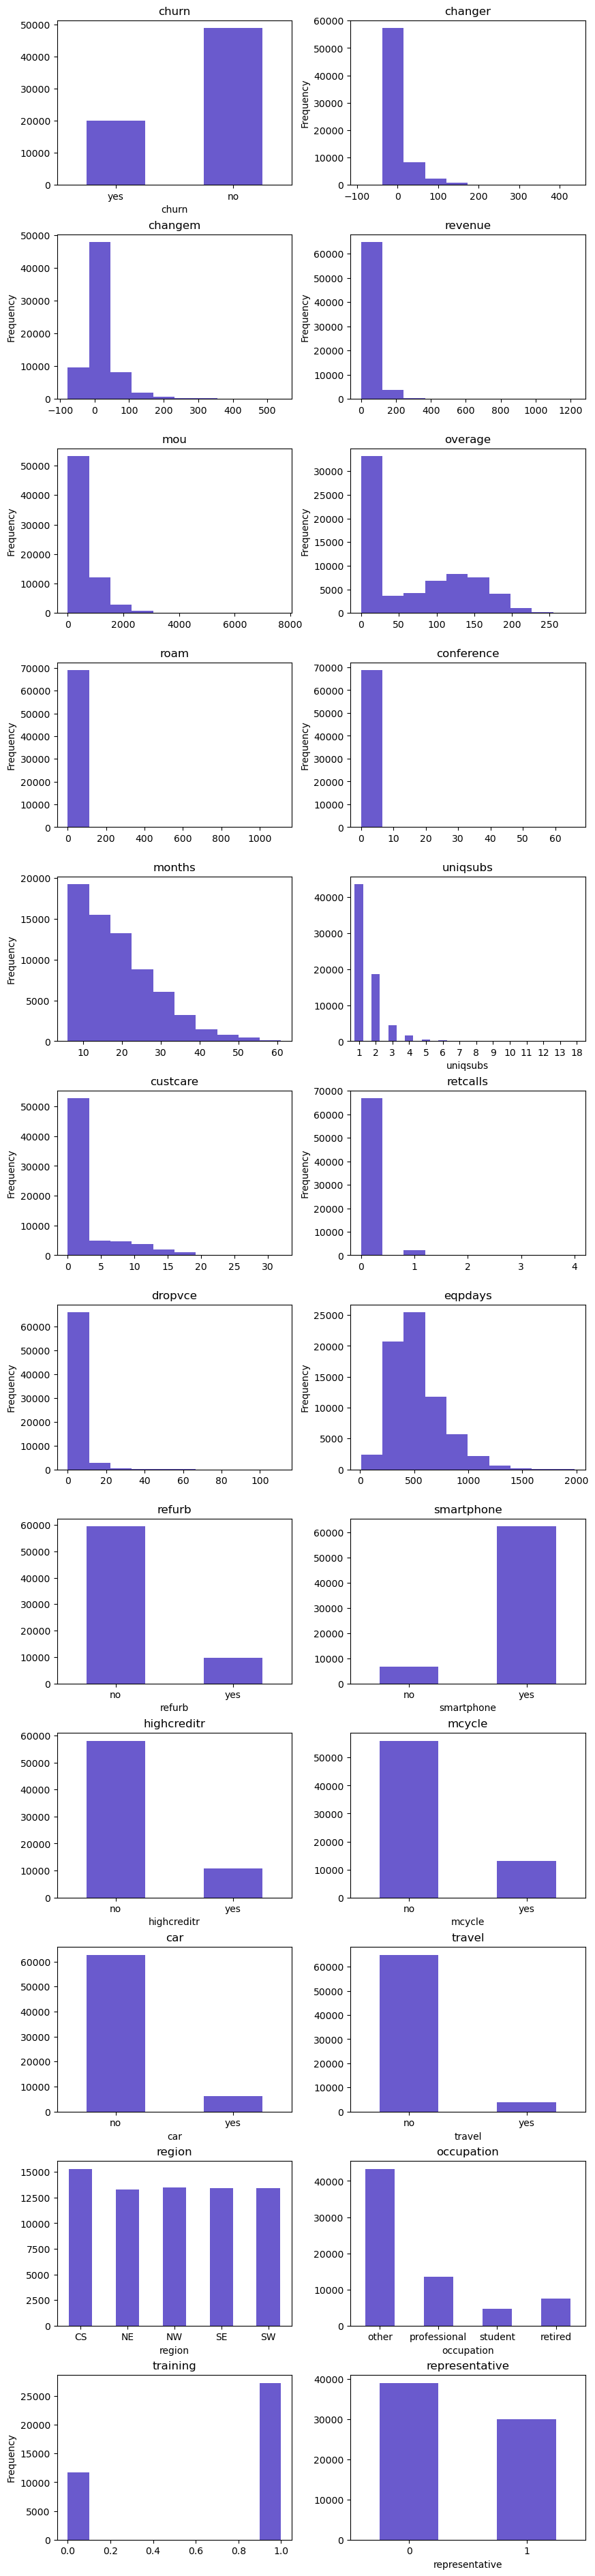

In [10]:
rsm.distr_plot(s_mobile)

In [11]:
s_mobile.head(2)

,customer,churn,changer,changem,revenue,mou,overage,roam,conference,months,...,refurb,smartphone,highcreditr,mcycle,car,travel,region,occupation,training,representative
0,U86940794,yes,109,81,62,600,141,0,0,8,...,no,yes,no,no,no,no,CS,other,0.0,0
1,U56788559,no,0,3,54,146,0,0,0,8,...,no,yes,yes,no,no,no,SE,other,0.0,0


We observe that a lot of numerical variables are skewed, and we will perform log transformation to standardize these variables. 

In [12]:
# num_variables = ['changer', 'changem', 'revenue','mou','overage', 'roam', 'conference', 'months', 'uniqsubs', 'custcare', 'retcalls',  'dropvce', 'eqpdays']
num_variables = ['revenue']
s_mobile[num_variables] = s_mobile[num_variables].apply(lambda x: np.log(x.clip(lower=1)))  # clip(lower=1) replaces all values less than 1 with 1
num_variables = num_variables + ['changer', 'changem','mou','overage', 'roam', 'conference', 'months', 'uniqsubs', 'custcare', 'retcalls',  'dropvce', 'eqpdays']
num_variables

['revenue',
 'changer',
 'changem',
 'mou',
 'overage',
 'roam',
 'conference',
 'months',
 'uniqsubs',
 'custcare',
 'retcalls',
 'dropvce',
 'eqpdays']

No plot will be created for customer (type object)


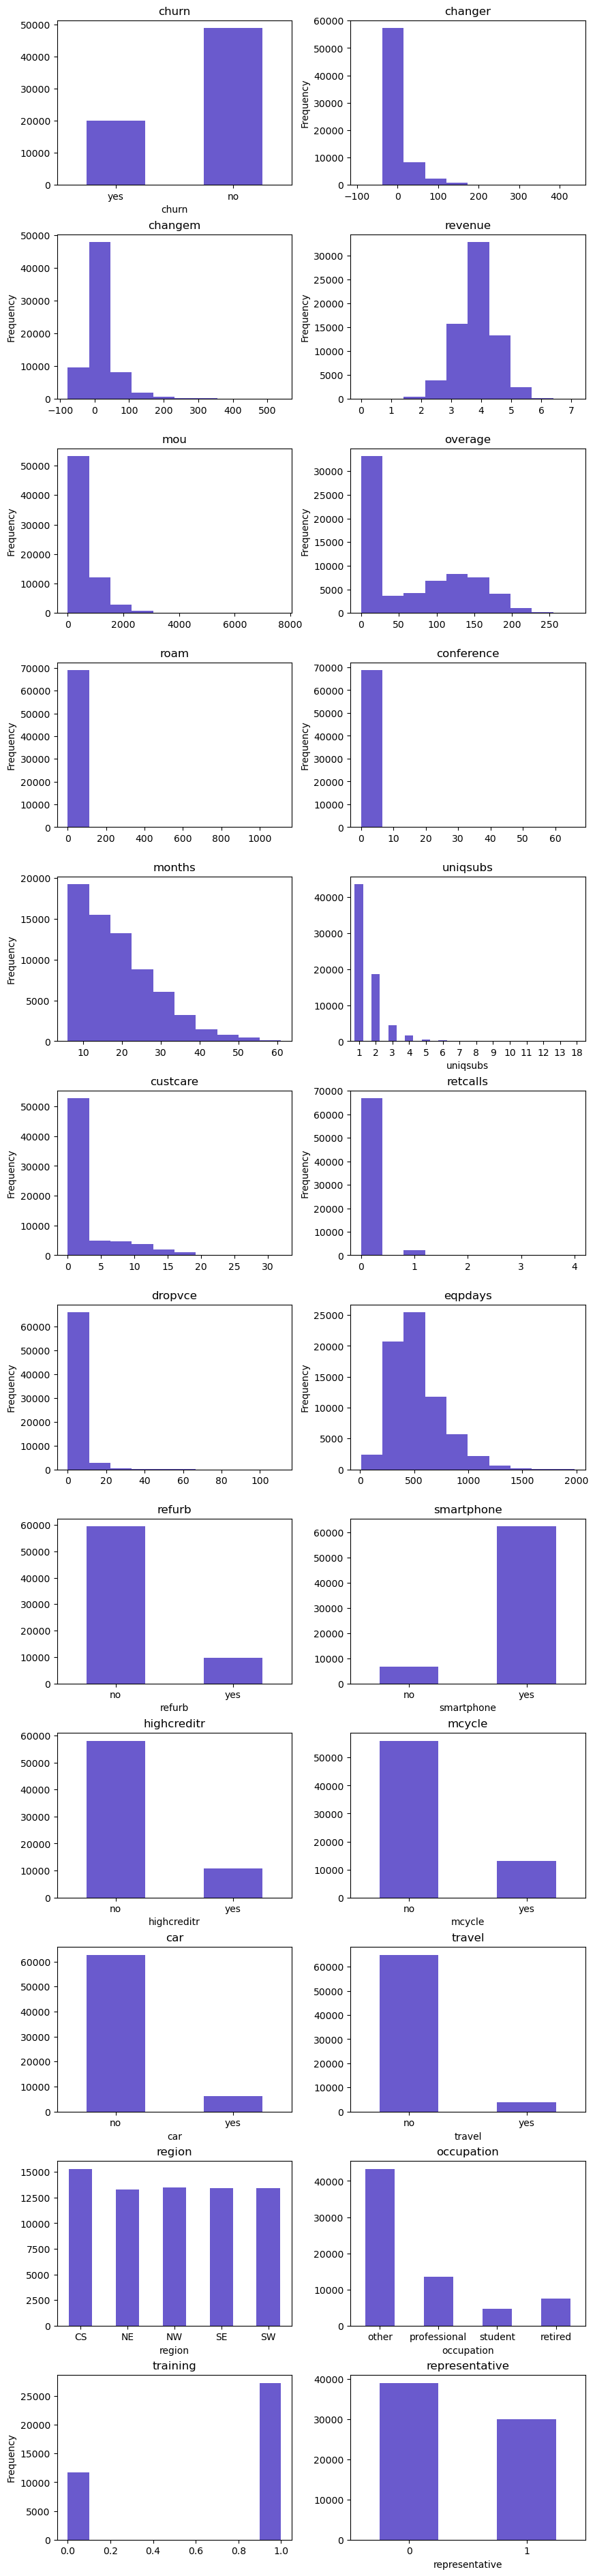

In [13]:
rsm.distr_plot(s_mobile)

In [14]:
s_mobile.head(3)

,customer,churn,changer,changem,revenue,mou,overage,roam,conference,months,...,refurb,smartphone,highcreditr,mcycle,car,travel,region,occupation,training,representative
0,U86940794,yes,109,81,4.127134,600,141,0,0,8,...,no,yes,no,no,no,no,CS,other,0.0,0
1,U56788559,no,0,3,3.988984,146,0,0,0,8,...,no,yes,yes,no,no,no,SE,other,0.0,0
2,U47928407,no,0,-9,3.663562,1158,96,0,1,9,...,no,yes,no,yes,no,yes,NW,professional,NaN,1


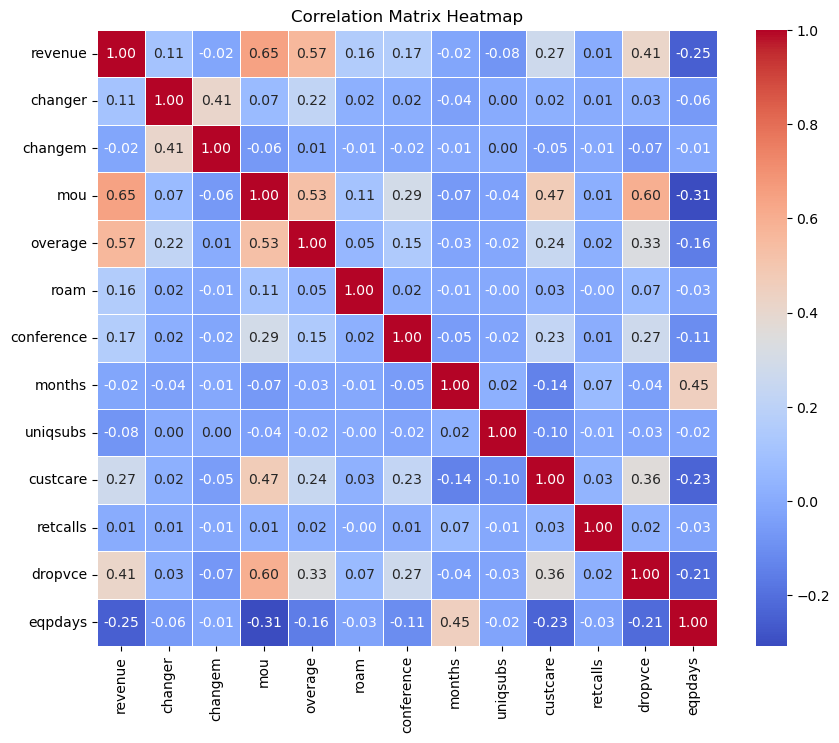

In [15]:
corr = s_mobile.loc[:, num_variables].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

As we can see, we don't have variables that strongly correlate

In [16]:
pd.get_dummies(
    s_mobile.loc[s_mobile.training == 1, "churn":],
    drop_first=True,
).agg(["mean", "std", "min", "max"]).T.round(3)

,mean,std,min,max
changer,8.661245,28.956823,-62.0,305.0
changem,15.211392,51.885577,-78.0,521.0
revenue,3.840677,0.645314,0.0,6.75227
mou,515.322308,525.458925,0.0,7668.0
overage,66.274286,69.258068,0.0,283.0
roam,1.197253,7.254327,0.0,692.0
conference,0.26348,1.083898,0.0,56.0
months,18.781502,9.595614,6.0,61.0
uniqsubs,1.546227,0.891051,1.0,18.0
custcare,2.288132,4.19297,0.0,32.0


In [17]:
pd.get_dummies(
    s_mobile.loc[s_mobile.representative == 1, "churn":],
    drop_first=True,
).agg(["mean", "std", "min", "max"]).T.round(3)

,mean,std,min,max
changer,8.310567,28.49632,-90.0,437.0
changem,17.254533,51.37539,-78.0,540.0
revenue,3.831535,0.641128,0.0,7.109062
mou,540.767067,536.368824,0.0,7359.0
overage,61.7234,67.846131,0.0,265.0
roam,1.187867,10.058579,0.0,1112.0
conference,0.2964,1.284316,0.0,66.0
months,18.592767,9.928488,6.0,61.0
uniqsubs,1.501367,0.840013,1.0,12.0
custcare,2.514533,4.357846,0.0,32.0


In [18]:
s_mobile["churn_yes"] = rsm.ifelse(s_mobile["churn"] == "yes", 1, 0)

We will find the weight using in our model to capture true characteristic of churn rate instead of 50% \
<b><i> (What) How did we come up with 1:49? </i></b>

As in the Notflix example, (1/0.033) = 30; where 3.33% was the attrition rate 
Our case has 2% attrition rate (98% non-churners rate), so (1/0.02) = 50

<b><i> (Why) And why do we do this? </i></b>

1 in every 50 customers churn, to balance the imbalanced dataset and make our model to give equal weights to each class, we add these weights. 

<b> <i> (How) How do we assign weights, and how does it affect the number of observations? </b> </i>

For observations with higher weights (non-churners in our case), the model treats them as if they are more numerous in the dataset, emphasizing their impact on the model's learning. 

In [19]:
class_weight_dict = {0: 49, 1: 1}
s_mobile["cweight"] = rsm.ifelse(
    s_mobile.churn == "yes", class_weight_dict[1], class_weight_dict[0]
)

In [20]:
s_mobile.columns.to_list()

['customer',
 'churn',
 'changer',
 'changem',
 'revenue',
 'mou',
 'overage',
 'roam',
 'conference',
 'months',
 'uniqsubs',
 'custcare',
 'retcalls',
 'dropvce',
 'eqpdays',
 'refurb',
 'smartphone',
 'highcreditr',
 'mcycle',
 'car',
 'travel',
 'region',
 'occupation',
 'training',
 'representative',
 'churn_yes',
 'cweight']

In [21]:
evar = ['changer', 'changem',
 'revenue', 'mou', 'overage',
 'roam', 'conference', 'months', 'uniqsubs',
 'custcare', 'retcalls', 'dropvce', 'eqpdays',
 'refurb', 'smartphone', 'highcreditr', 'mcycle',
 'car', 'travel', 'region', 'occupation']

<font color = 'black'> <b> 
1. Develop a model to predict customer churn 

* Feel free to use any technique you like to predict churn. However, one of your models must be a logistic regression
* Build models using the training data and explain your modeling choices 
</b> </font>

In [22]:
lr = rsm.model.logistic(
    data = {'s_mobile': s_mobile[s_mobile.training == 1]}, 
    rvar = 'churn', 
    lev = 'yes', 
    evar = evar   
)

lr.summary()

Logistic regression (GLM)
Data                 : s_mobile
Response variable    : churn
Level                : yes
Explanatory variables: changer, changem, revenue, mou, overage, roam, conference, months, uniqsubs, custcare, retcalls, dropvce, eqpdays, refurb, smartphone, highcreditr, mcycle, car, travel, region, occupation
Null hyp.: There is no effect of x on churn
Alt. hyp.: There is an effect of x on churn

                             OR     OR%  coefficient  std.error  z.value p.value     
Intercept                 0.944   -5.6%        -0.06      0.129   -0.442   0.658     
refurb[yes]               1.351   35.1%         0.30      0.038    7.948  < .001  ***
smartphone[yes]           0.912   -8.8%        -0.09      0.047   -1.973   0.049    *
highcreditr[yes]          0.493  -50.7%        -0.71      0.040  -17.730  < .001  ***
mcycle[yes]               0.900  -10.0%        -0.11      0.043   -2.478   0.013    *
car[yes]                  1.001    0.1%         0.00      0.057    0.0

In [23]:
lr_weights = rsm.model.logistic(
    data = {'s_mobile': s_mobile[s_mobile.training == 1]}, 
    rvar = 'churn', 
    lev = 'yes', 
    evar = evar,
    weights = "cweight"  
)

lr_weights.summary(main = False, fit = True)


Pseudo R-squared (McFadden): 0.047
Pseudo R-squared (McFadden adjusted): 0.046
Area under the RO Curve (AUC): 0.688
Log-likelihood: -63795.824, AIC: 127645.648, BIC: 127954.353
Chi-squared: 6231.742, df(26), p.value < 0.001 
Nr obs: 682,500


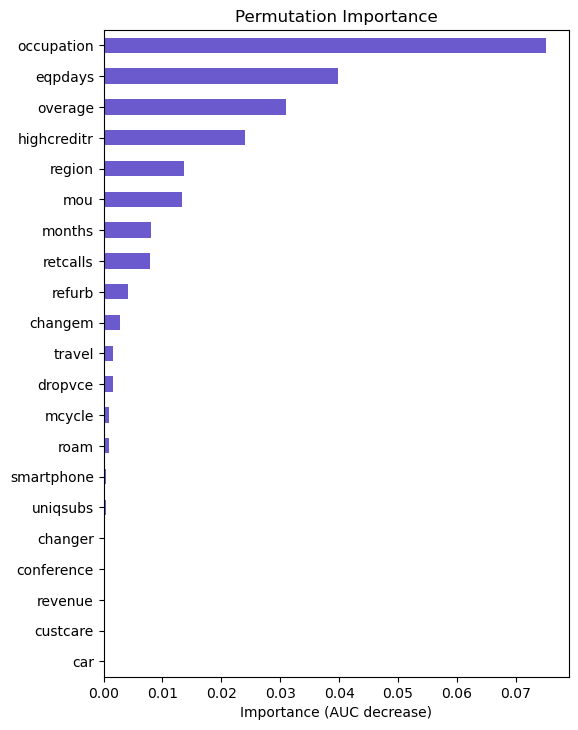

In [24]:
lr_weights.plot('vimp')

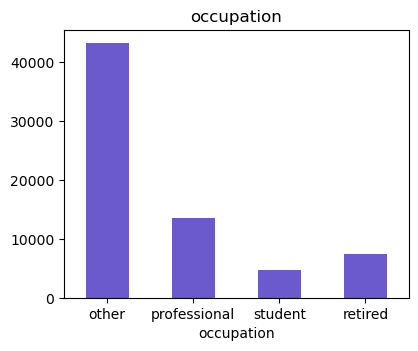

In [25]:
rsm.distr_plot(s_mobile['occupation'])

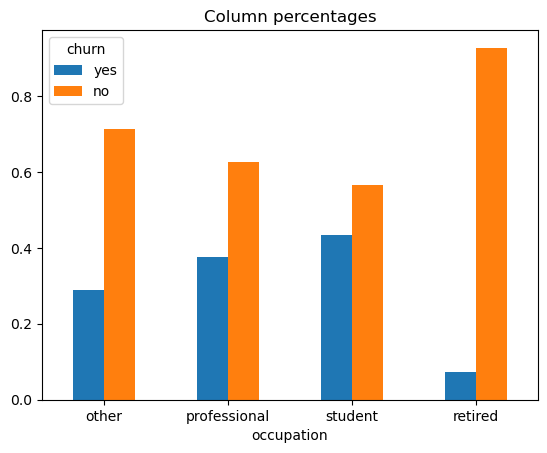

In [26]:
ct = rsm.basics.cross_tabs(s_mobile, "churn", 'occupation')
ct.plot()

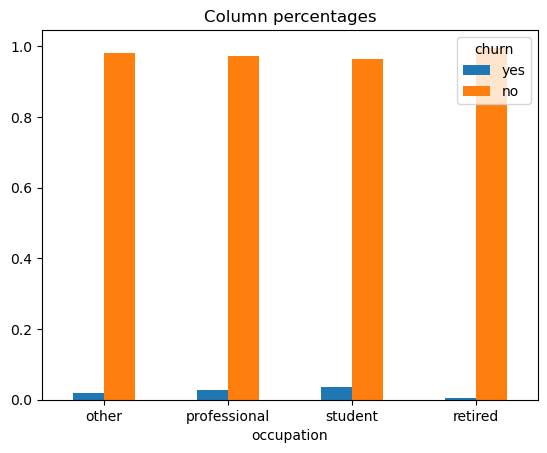

In [50]:
ct = rsm.basics.cross_tabs(s_mobile_1M, "churn", 'occupation')
ct.plot()

We can distern from permutation important plot that occupation is the most significant feature. When we dig deeper we will see that retired people has significantly low churn rate so that we will create another variable call retired_yes to help model performance

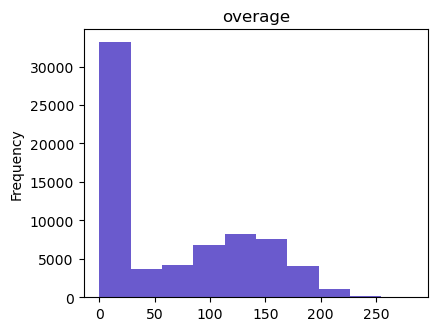

In [27]:
rsm.distr_plot(s_mobile['overage'])

For overage we will use 2 as an cut off

In [28]:
s_mobile['retired_yes'] = s_mobile['occupation'] == 'retired'

In [29]:
s_mobile['overage<2'] = s_mobile['overage'] < 2

In [30]:
s_mobile.head(2)

,customer,churn,changer,changem,revenue,mou,overage,roam,conference,months,...,car,travel,region,occupation,training,representative,churn_yes,cweight,retired_yes,overage<2
0,U86940794,yes,109,81,4.127134,600,141,0,0,8,...,no,no,CS,other,0.0,0,1,1,False,False
1,U56788559,no,0,3,3.988984,146,0,0,0,8,...,no,no,SE,other,0.0,0,0,49,False,True


Re-train the model

In [99]:
evar = ['changer',
 'changem',
 'revenue',
 'mou',
 'roam',
 'conference',
 'months',
 'uniqsubs',
 'custcare',
 'retcalls',
 'dropvce',
 'eqpdays',
 'refurb',
 'smartphone',
 'highcreditr',
 'mcycle',
 'car',
 'travel',
 'region',
 'occupation', 'retired_yes', 'overage<2', 'overage']

In [100]:
lr_weights = rsm.model.logistic(
    data = {'s_mobile': s_mobile[s_mobile.training == 1]}, 
    rvar = 'churn', 
    lev = 'yes', 
    evar = evar,
    weights = "cweight"  
)

lr_weights.summary(main = True, fit = True)

Logistic regression (GLM)
Data                 : s_mobile
Response variable    : churn
Level                : yes
Explanatory variables: changer, changem, revenue, mou, roam, conference, months, uniqsubs, custcare, retcalls, dropvce, eqpdays, refurb, smartphone, highcreditr, mcycle, car, travel, region, occupation, retired_yes, overage<2, overage
Weights used         : cweight
Null hyp.: There is no effect of x on churn
Alt. hyp.: There is an effect of x on churn

                             OR     OR%  coefficient  std.error  z.value p.value     
Intercept                 0.025  -97.5%        -3.71      0.088  -42.135  < .001  ***
refurb[yes]               1.321   32.1%         0.28      0.025   11.082  < .001  ***
smartphone[yes]           0.912   -8.8%        -0.09      0.030   -3.082   0.002   **
highcreditr[yes]          0.486  -51.4%        -0.72      0.031  -23.527  < .001  ***
mcycle[yes]               0.883  -11.7%        -0.12      0.029   -4.303  < .001  ***
car[yes]       

We will try using random forest

In [33]:
s_mobile_1M['retired_yes'] = s_mobile_1M['occupation'] == 'retired'
s_mobile_1M['overage<2'] = s_mobile_1M['overage'] < 2
s_mobile_1M["cweight"] = rsm.ifelse(
    s_mobile_1M.churn == "yes", class_weight_dict[1], class_weight_dict[0]
)

In [34]:
rf = rsm.model.rforest(
    data = {'s_mobile_1M': s_mobile_1M[s_mobile_1M.training == 1]}, 
    rvar = 'churn', 
    lev = 'yes', 
    evar = evar,
    mod_type = 'classification',
    n_estimators = 400, 
    min_samples_leaf = 0.2
)

rf.summary()

Random Forest
Data                 : s_mobile_1M
Response variable    : churn
Level                : yes
Explanatory variables: changer, changem, revenue, mou, roam, conference, months, uniqsubs, custcare, retcalls, dropvce, eqpdays, refurb, smartphone, highcreditr, mcycle, car, travel, region, occupation, retired_yes, overage<2
OOB                  : True
Model type           : classification
Nr. of features      : (22, 35)
Nr. of observations  : 682,500
max_features         : sqrt (5)
n_estimators         : 400
min_samples_leaf     : 0.2
random_state         : 1234
AUC                  : 0.626

Estimation data      :
 changer  changem  revenue  mou  roam  conference  months  uniqsubs  custcare  retcalls  dropvce  eqpdays  retired_yes  overage<2  refurb_no  refurb_yes  smartphone_no  smartphone_yes  highcreditr_no  highcreditr_yes  mcycle_no  mcycle_yes  car_no  car_yes  travel_no  travel_yes  region_CS  region_NE  region_NW  region_SE  region_SW  occupation_other  occupation_professi

We will continue with logit model

<font color = 'black'> <b> Use your model to describe the main drivers of churn and report on the key factors that predict 
customer churn and their relative importance. 
* Briefly discuss 5 key drivers of churn from your analysis in this step using Variable Importance (Permutation Importance) and Prediction or Partial Dependence plots </b> </font>

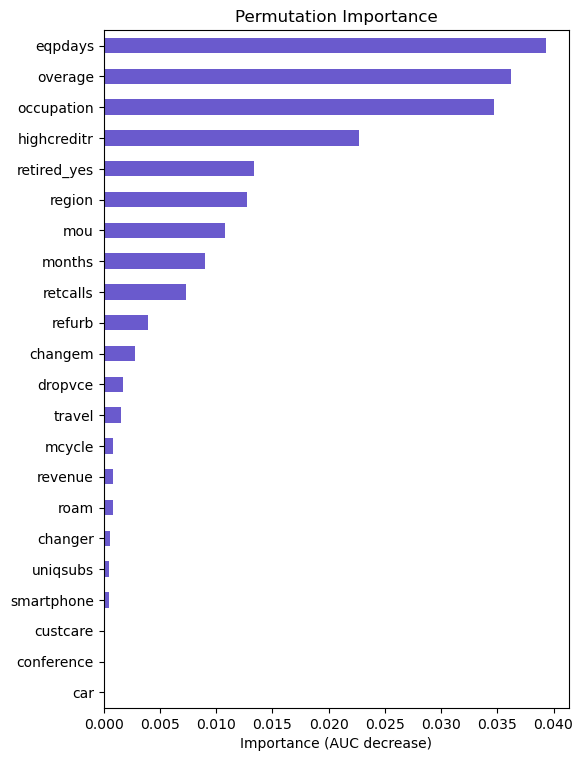

In [43]:
lr_weights.plot("vimp")

<font color = 'black'> <b> By variable/permutation importance plot, the most important 5 features/drivers for churn turn out to be `occupation`, `eqpdays`, `overage`, `highcreditr`, and `region`. </b> </font>

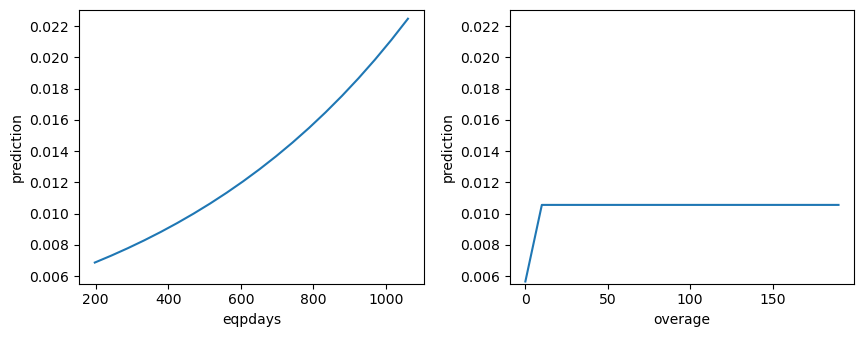

In [45]:
lr_weights.plot(
    "pred",
    data=s_mobile[s_mobile.representative == 1],
    incl=["eqpdays", "overage"],
)

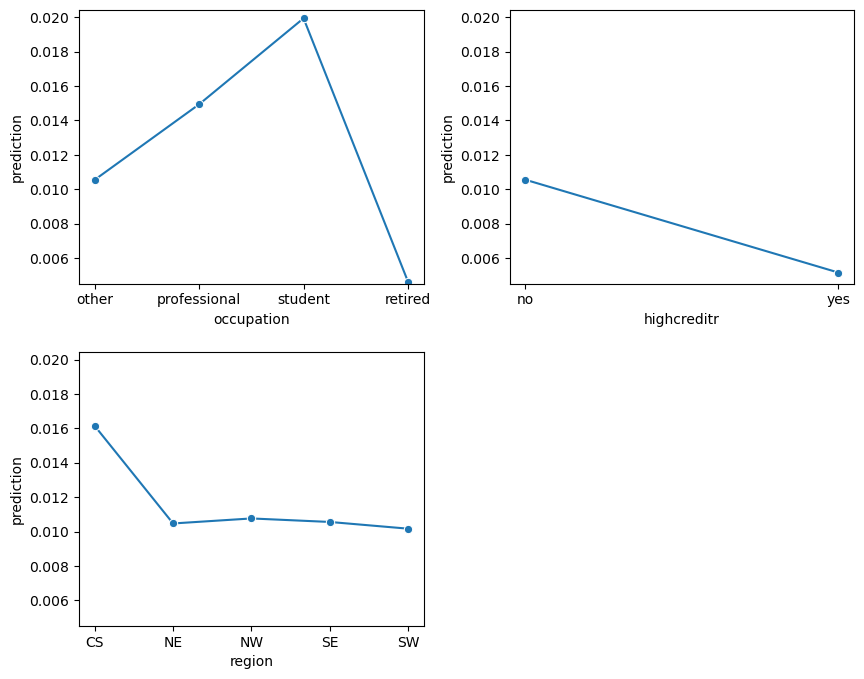

In [41]:
lr_weights.plot(
    "pred",
    data=s_mobile[s_mobile.representative == 1],
    incl=["occupation", "highcreditr", "region"],
)

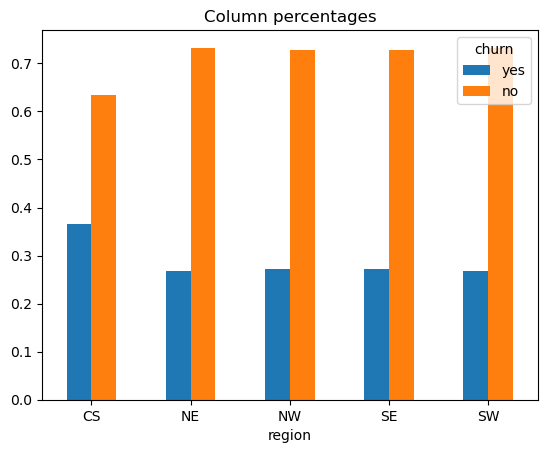

In [53]:
ct = rsm.basics.cross_tabs(s_mobile, "churn", 'region')
ct.plot()

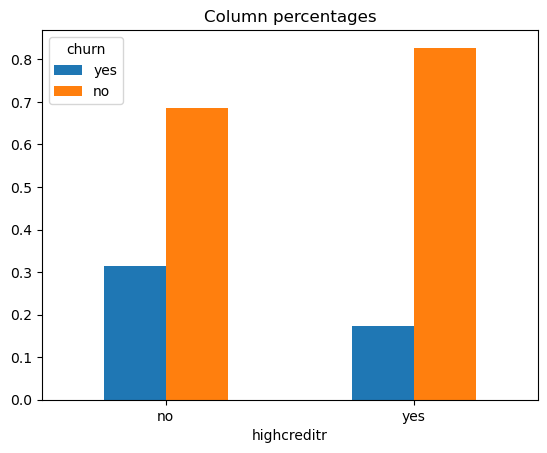

In [47]:
ct = rsm.basics.cross_tabs(s_mobile, "churn", 'highcreditr')
ct.plot()

### 3. Use insights on churn drivers to develop actions/offers/incentives
• Consider each variable type, e.g., “Equipment characteristic”, “Customer usage”, etc. (see
the data table at the end of this case)

`occupation` - Customer Characteristic \
`creditr`- Customer Characteristic \
`region` - Customer Characteristic \
`eqpdays`- Equipment characteristic \
`overage`- Customer usage \
`changer` - Usage Trend \
`custcare` - Customer Action

***Occupation:*** Offer student discounts and professional bundles to students and professionals respectively, a group with a notably high churn rate.

***Credit Rating (creditr):*** For those with a high credit rating,  we could consider offering premium services or finance plans for new devices.

***Region:*** The Central Singapore region has the highest churn rate, indicating possible issues such as poor network quality or customer service. Despite occupation distribution being uniform across regions, the region's high churn is likely influenced by factors external to our current data, such as network quality or service levels. Addressing these concerns as well as offering region -specific offers based on the current trend can help retain customers.

***Equipment Days (eqpdays)***  These metrics are associated with higher churn rates. For eqpdays, attracting new customers or old customers to buy new phone could refresh the user base and reduce churn by introducing an offer of exchanging their old phone with a new mobile device.

***Mean Monthly Overage Minutes:*** Regarding overage, contacting customers to adjust their plans might prevent churn by aligning their services more closely with their usage patterns.
For example, offer plans with a higher data cap or minutes to customers frequently facing overage charges, possibly paired with an app or service to better monitor their usage.

***'changer` % change in revenue over the most recent 4 month period*** : For those with decreasing revenue, we could send out personalized retention offers like discounts or bonus services to boost spending. For those with increasing revenue, loyalty rewards, gift cards or upsell opportunities could be used. 

***Mean number of calls to customer care*** : High customer care calls might indicate service issues; proactive outreach and personalized support could mitigate potential churn, while also following up with the customers if they experience any other issues. 

By addressing these areas—tailoring offers based on occupation, considering credit ratings, focusing on regions with high churn, and adjusting to usage patterns—we can create a more targeted approach to reduce customer churn.

/tmp/ipykernel_28980/2897865544.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = s_mobile.groupby(['region', 'occupation'])['occupation'].count()


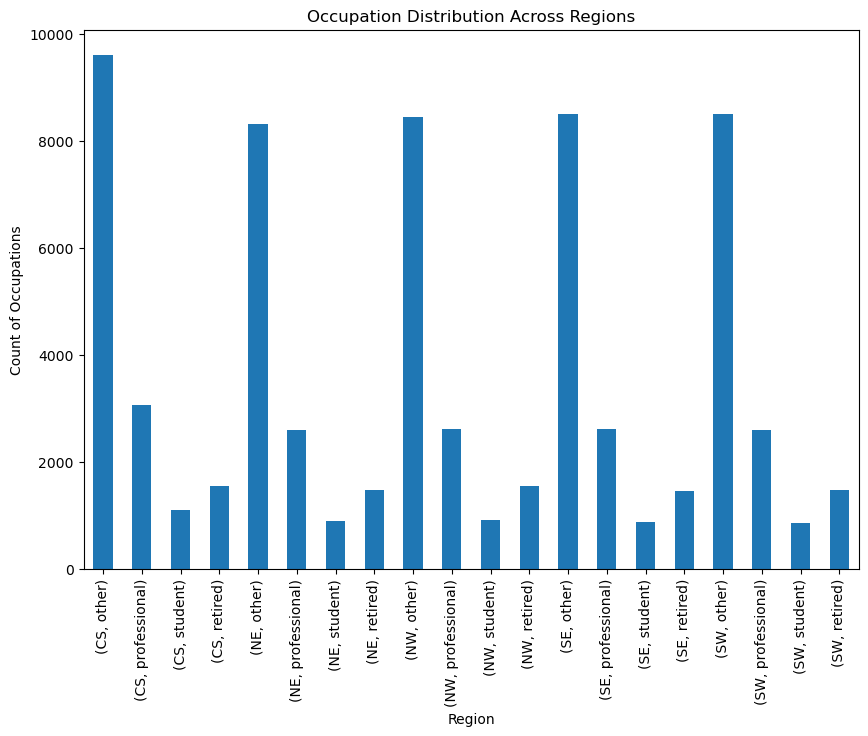

In [60]:
df = s_mobile.groupby(['region', 'occupation'])['occupation'].count()

df.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.title('Occupation Distribution Across Regions')
plt.xlabel('Region')
plt.ylabel('Count of Occupations')

plt.show()

/tmp/ipykernel_28980/4213482583.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = s_mobile.groupby(['region'])['eqpdays'].sum()


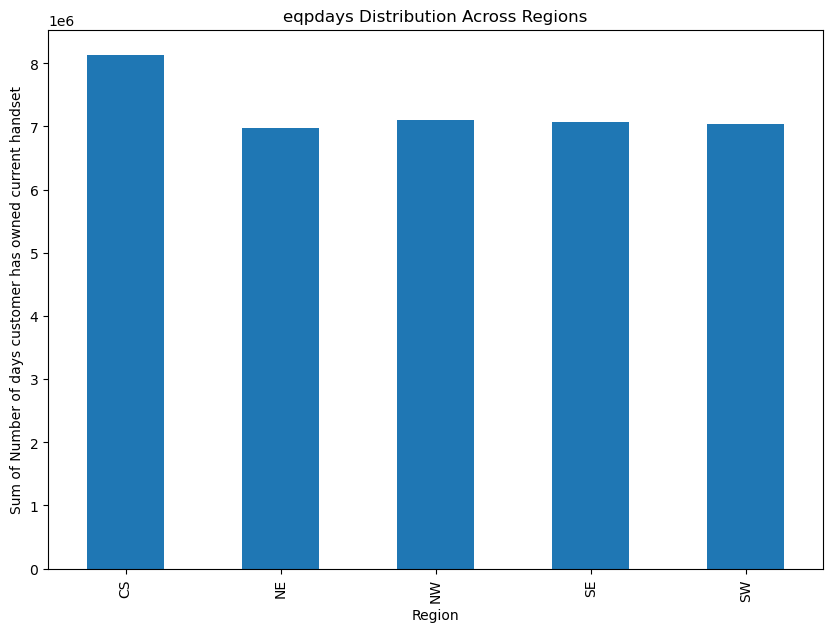

In [82]:
df = s_mobile.groupby(['region'])['eqpdays'].sum()

df.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.title('eqpdays Distribution Across Regions')
plt.xlabel('Region')
plt.ylabel('Sum of Number of days customer has owned current handset')

plt.show()

/tmp/ipykernel_28980/2696688257.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = s_mobile.groupby(['region'])['overage'].sum()


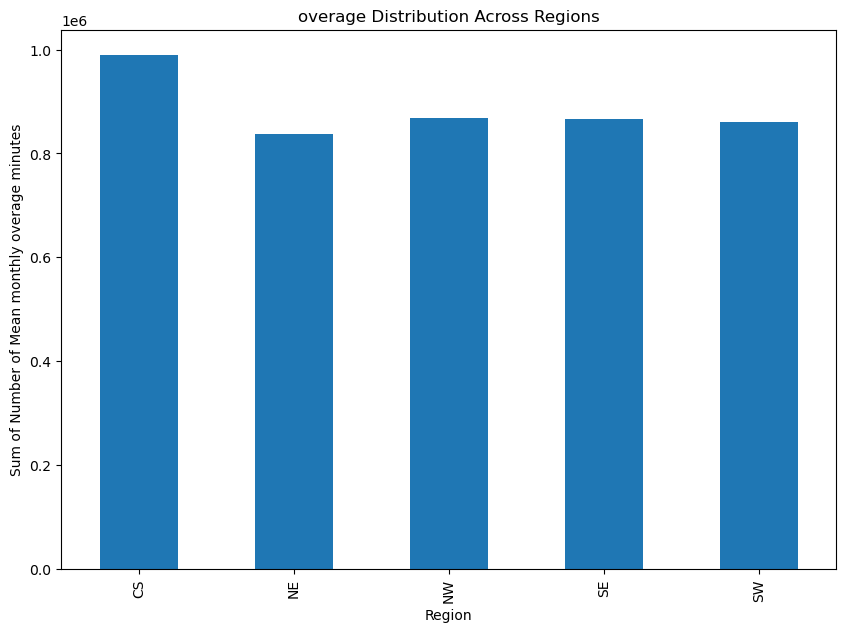

In [83]:
df = s_mobile.groupby(['region'])['overage'].sum()

df.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.title('overage Distribution Across Regions')
plt.xlabel('Region')
plt.ylabel('Sum of Number of Mean monthly overage minutes')

plt.show()

<font color = 'black'>  
<h3><b> 4. Quantify the impact of these actions/offers/incentives on the probability of churn </b></h3> 

• Either (i) predict the effect of a churn driver (similar to what we did for Pentathlon NPTB) or
(ii) suggest how you might set up an experiment (RCT) to evaluate the action/incentive/offer
in the field \
• Generate predictions for the representative sample \
• Since it is not feasible to execute an RCT, describe how you would set up such an experiment and then make an assumption about the impact on churn that you can use in steps 5 and 6  </font>

<font color = 'black'> <b> <h3> Occupation </h3> </b> </font>

We will start working on measuring the effect of offers towards students and professional in the *occupation* variable

<font color = 'black'>

**Assumptions:** The company has a budget to subsidize 10% discount in the monthly bill for students and professional groups.

**How to quantify**: 

 To understand the impact of offering a 10% discount on the monthly bill to students and professionals, we will conduct an experiment. We'll divide students and professionals into two groups each: one will be the control group (no discount), and the other will be the treatment group (receives a 10% discount). This setup will help us observe the effect of the discount on customer retention.

*Control Group:* Students and professionals without any discount. 

*Treatment 1:* Students receive a 10% discount, while professionals do not. 

*Treatment 2:* Professionals receive a 10% discount, while students do not. 

*Treatment 3:* Both students and professionals receive a 10% discount. 

By comparing these groups, we can measure how the discount influences their decision to stay with or leave the company. This experiment will help us understand the discount's impact on churn rates and, ultimately, on the Customer Lifetime Value (CLV) in the long term.

</font>

<font color = 'black'> <b> <h3> Credit Rating </h3> </b> </font>

In [113]:
s_mobile_rep = s_mobile.query("representative == 1").copy()
s_mobile_rep[["churn_yes"]].agg(
    ["count", "mean"]
).round(4)

,churn_yes
count,30000.00
mean,0.02


In [116]:
# impact of increasing high-credit-rating customers on churn probability
s_mobile_rep["p_base"] = lr_weights.predict(s_mobile_rep)["prediction"]
s_mobile_rep["p_highcreditr"] = lr_weights.predict(s_mobile_rep.assign(highcreditr='yes'))["prediction"]
s_mobile_rep.query("highcreditr == 'no'")[["churn_yes", "p_highcreditr"]].agg(
    ["count", "mean"]
).round(4)

,churn_yes,p_highcreditr
count,24487.0000,24487.0000
mean,0.0223,0.0109


<font color = 'green'> **If we target only the customers who have churn rates higher than average and have a bad credit score, it can be seen that the effects are more impactful from 3.46% to 1.64%** </font>

In [115]:
# impact of increasing high-credit-rating customers on churn probability
s_mobile_rep["p_base"] = lr_weights.predict(s_mobile_rep)["prediction"]
s_mobile_rep["p_highcreditr"] = lr_weights.predict(s_mobile_rep.assign(highcreditr='yes'))["prediction"]
s_mobile_rep.query("highcreditr == 'no' & p_base > 0.02")[["churn_yes", "p_highcreditr"]].agg(
    ["count", "mean"]
).round(4)

,churn_yes,p_highcreditr
count,11816.0000,11816.0000
mean,0.0346,0.0164


<font color = 'black'> <b> <h3> Region </h3> </b> </font>

<font color = 'black'> 

**How to quantify:** 
**Experiment Design**
**Objective**: Determine the impact of improved network quality or enhanced customer service on reducing churn rates in the Central Singapore. 

**Population:** Customers from the Central Singapore.

**Randomization:** Divide the customer population into two groups:

**Control Group:** Customers who experience the current network quality and customer service levels.

**Treatment Group:** Customers who receive the improved network quality or enhanced customer service interventions.

**Intervention:** Implement the planned improvements in network quality or customer service for the treatment group. Ensure that the control group continues to receive the standard service level.

**Data Collection:** Track churn rates and other relevant metrics (e.g., customer satisfaction scores, service quality indicators) for both groups throughout the experiment.

**Hypotheses**
**Null Hypothesis (H0):** There is no difference in churn rates between customers who receive the improved services and those who do not.
**Alternative Hypothesis (H1):** Customers who receive the improved services have a lower churn rate than those who do not.

**Statistical Analysis**
Conduct a hypothesis test (e.g., a chi-square test for categorical data like churn/no churn) to compare the churn rates between the two groups.
Calculate the effect size to understand the magnitude of the intervention's impact.
Assess the statistical significance (typically at the 0.05 level) to determine whether the observed differences are not due to chance.

**Interpret Results**
If the results are statistically significant and show a lower churn rate in the treatment group, it suggests that the interventions were effective in reducing churn.
Quantify the impact by calculating the reduction in churn rate and projecting its effect on customer lifetime value (CLV).

</font>




<font color = 'black'> <b> <h3> Equipment Days </h3> </b> </font>

We've set a threshold of 1000 days (approximately 2 standard deviations) to decide when to offer customers a new device. If customers reach this threshold, we will contact them with the offer. We've chosen a high threshold because we expect the success rates of this offer to be lower compared to offering new packages or promotions. This approach helps us target the offer to those who might be most in need of a new device.

In [134]:
# impact of accuring new customers (new phone) on churn probability
s_mobile_rep["p_eqpdays"] = lr_weights.predict(s_mobile_rep.assign(eqpdays=0))["prediction"]
s_mobile_rep.query("eqpdays > 1000 & p_base > 0.02")[["churn_yes", "p_eqpdays"]].agg(
    ["count", "mean"]
).round(4)

,churn_yes,p_eqpdays
count,798.0000,798.0000
mean,0.0414,0.0089


<font color = 'black'> <b> <h3> Mean Monthly Overage Minutes </h3> </b> </font>

In [137]:
# impact of accuring new customers (new phone) on churn probability
s_mobile_rep["p_overage"] = lr_weights.predict(s_mobile_rep.assign(overage=0))["prediction"]
s_mobile_rep.query("overage > 0")[["churn_yes", "p_overage"]].agg(
    ["count", "mean"]
).round(4)

,churn_yes,p_overage
count,16264.0000,16264.0000
mean,0.0243,0.0131


<font color = 'black'> <b> Decide which actions/offers/incentives to target to which customers 
• For each action/offer/incentive specify the criteria used to select customers. Will you apply 
the action/offer/incentive to all customers, or a subset? Motivate your approach </b> </font>

<font color = 'black'>
Answer 5. 
When deciding which actions, offers, or incentives to target to our customers, we employ a strategic approach that carefully considers customer segmentation, the expected impact of these initiatives, their cost-effectiveness, and how well they align with our business objectives. Here's how we go about specifying criteria for customer selection for each action, offer, or incentive:

1. **Customer Segmentation:** We start by segmenting our customer base using relevant criteria such as behavior, demographics, usage patterns, and customer value. We often use:
   - **Demographic Segmentation**, like age, occupation, and income level, which is particularly relevant for offers that appeal to specific groups. For example, offering a 10% discount to students and professionals targets these demographic groups directly.
   - **Behavioral Segmentation**, where we look at purchase history, product usage, engagement levels, previous responses to offers, and churn risk.
   - **Value-Based Segmentation**, focusing on Customer Lifetime Value (CLV) to identify high-value customers who are more profitable in the long term.

2. **Define Criteria for Each Action/Offer/Incentive:** Based on the segments we've identified, we define clear criteria for each proposed action or incentive. We consider:
   - **Churn Risk**: We're more inclined to offer retention incentives to customers identified as high-risk through predictive modeling.
   - **Customer Value**: We prioritize high-value customers for more expensive incentives to maximize the return on investment.
   - **Engagement Level**: Customers with lower engagement might need different offers to rekindle their interest compared to those who are highly engaged.
   - **Cost-Benefit Analysis**: We always ensure the cost of providing the offer does not outweigh the expected benefit in terms of reduced churn and increased customer lifetime value.

3. **Specific Offers for Specific Segments:**
   - For those at **High Churn Risk**, we consider discounts, enhanced support, or personalized plans.
   - **High-Value Customers** might receive premium offers, loyalty rewards, or exclusive access to new features/products.
   - To increase product usage and engagement among **Low Engagement** customers, we might introduce usage-based discounts, tutorials, or engagement programs.
   - Specifically for **Students and Professionals**, we target them with a 10% discount on their monthly bill based on their occupation data.

4. **Test and Iterate:** 
   - We often run **Pilot Programs** for selected segments before widespread implementation to gauge the effectiveness of each action, offer, or incentive.
   - Based on the feedback received and the performance monitored, we make necessary adjustments to our strategy to ensure the best outcomes.

**Motivation for a Segmented Approach:** We believe a one-size-fits-all approach is rarely effective in customer retention strategies. By tailoring actions, offers, and incentives based on customer segmentation, we ensure that each customer receives the most relevant and compelling offer, which significantly increases the likelihood of a positive response. This approach also optimizes the allocation of marketing resources, ensuring that our investment in customer retention delivers the best possible return. </font>

<font color = 'black'>
6. Evaluate the economics (CLV):  <br>
• For three actions/offers/incentives provide a comprehensive evaluation of the profitability implications using a 5-year (60 month) time window

Assumptions about costs - 

**Marketing costs = 10%** (based on the `communications media` cost given in the table from this website https://blog.hubspot.com/marketing/marketing-budget-percentage)

**Annual Growth rate = 6.2%** (The global telecom services market size was valued at USD 1,805.61 billion in 2022 and is expected to expand at a compound annual growth rate (CAGR) of 6.2% from 2023 to 2030.  https://www.grandviewresearch.com/industry-analysis/global-telecom-services-market#:~:text=The%20global%20telecom%20services%20market%20size%20was%20valued,rate%20%28CAGR%29%20of%206.2%25%20from%202023%20to%202030) 

**Annual Discount rate = 5.5%** (Derived from this link - https://ycharts.com/indicators/us_discount_rate)

**Service cost - 38%** Could not find any source for service cost, so we used ChatGPT for the assumption. 
Here is its answer : 

The telecom industry is capital intensive, particularly with the roll-out of 5G and the maintenance of extensive network infrastructures. A moderate assumption that balances these costs with operational efficiencies might place the cost of service at around ***35-40%*** of revenue, slightly below the initial assumption to reflect potential economies of scale and technological advancements reducing per-unit costs over time.

</font>

<font color = 'black'>

For customer segments identified as 'retired' or 'other', who tend to exceed their allotted minutes or talktime (indicating **high overage**), implementing plans with more flexible data and minute allowances could significantly enhance customer satisfaction and retention. The data suggests that *overage is a critical driver* of churn within these segments, as evidenced by the substantial decrease in churn probability from **0.197%** to 
**0.0117%** when overage is reduced to zero. Although the increase in Customer Lifetime Value (CLV) for this adjustment is relatively modest ($2.85), the marked reduction in churn probability highlights the potential for improved customer loyalty and long-term revenue stability.
<br>

To cater to these customers' needs more effectively, **additional incentives** such as bonus data or extra talktime could be introduced, aligning more closely with their usage patterns. Moreover, offering dedicated customer service support can further aid in troubleshooting device or usage-related issues, thereby enhancing the overall customer experience. 
</font>

In [6]:
annual_growth = 0.062

annual_discount_rate = 0.055
monthly_discount_rate = (1 + annual_discount_rate) ** (1 / 12) - 1

annual_overage_churn = 0.0131
annual_eqpdays_churn = 0.0089
annual_highcreditr_churn = 0.0164

monthly_overage_churn = 1 - (1 - annual_overage_churn) ** (1 / 12)
monthly_eqpdays_churn = 1 - (1 - annual_eqpdays_churn) ** (1 / 12)
monthly_highcreditr_churn = 1 - (1 - annual_highcreditr_churn) ** (1 / 12)

cost_service = 0.38
marketing_cost = 0.1

nr_years = 5
nr_months = 5 * 12

In [27]:
time = np.array(range(0, nr_months)) + 1
monthly_growth = np.power(1 + annual_growth, 1/12) ** np.arange(nr_months)
monthly_growth = monthly_growth.reshape(-1, 1)

revenues = np.tile(s_mobile_1M["revenue"].values[:nr_months], (nr_years,1)).astype(float)
revenues = revenues.reshape(nr_months, nr_years)
revenues *= monthly_growth

service = cost_service * revenues
marketing = revenues * marketing_cost
profit = revenues - service - marketing
mean_profit = profit.mean()

active_overage = (1 - monthly_overage_churn) ** time
active_overage = np.power(1 - monthly_overage_churn, time-1)
active_avg_overage = (active_overage + rsm.lag(active_overage, fill=1)) / 2

active_eqpdays = (1 - monthly_eqpdays_churn) ** time
active_eqpdays = np.power(1 - monthly_eqpdays_churn, time)
active_avg_eqpdays = (active_eqpdays + rsm.lag(active_eqpdays, fill=1)) / 2

active_highcreditr = (1 - monthly_highcreditr_churn) ** time
active_highcreditr = np.power(1 - monthly_highcreditr_churn, time)
active_avg_highcreditr = (active_highcreditr + rsm.lag(active_highcreditr, fill=1)) / 2

# mean overage minutes
exp_profit_overage = active_avg_overage * mean_profit
PV_exp_profit_overage = exp_profit_overage / np.power(1 + monthly_discount_rate, time)
CLV_overage = np.cumsum(PV_exp_profit_overage)

# Number of days customer has owned current handset
exp_profit_eqpdays = active_avg_eqpdays * mean_profit
PV_exp_profit_eqpdays = exp_profit_eqpdays / np.power(1 + monthly_discount_rate, time)
CLV_eqpdays = np.cumsum(PV_exp_profit_eqpdays)

# high credit rate
exp_profit_highcreditr = active_avg_highcreditr * mean_profit
PV_exp_profit_highcreditr = exp_profit_highcreditr / np.power(1 + monthly_discount_rate, time)
CLV_highcreditr = np.cumsum(PV_exp_profit_highcreditr)

s_mobile_1M_CLV = pd.DataFrame({
    "time": time,
    "active_overage": (100 * active_avg_overage).round(2),
    "active_eqpdays": (100 * active_avg_eqpdays).round(2),
    "active_highcreditr": (100 * active_avg_highcreditr).round(2),
    "CLV_overage": CLV_overage,
    "CLV_eqpdays": CLV_eqpdays,
    "CLV_highcreditr": CLV_highcreditr
})

s_mobile_1M_CLV.round(2)

,time,active_overage,active_eqpdays,active_highcreditr,CLV_overage,CLV_eqpdays,CLV_highcreditr
0,1,100.00,99.96,99.93,40.97,40.96,40.94
1,2,99.95,99.89,99.79,81.74,81.70,81.65
2,3,99.84,99.81,99.66,122.28,122.23,122.12
3,4,99.73,99.74,99.52,162.60,162.55,162.35
4,5,99.62,99.67,99.38,202.69,202.67,202.35
5,6,99.51,99.59,99.24,242.56,242.57,242.11
6,7,99.40,99.52,99.11,282.21,282.27,281.65
7,8,99.29,99.44,98.97,321.64,321.76,320.95
8,9,99.18,99.37,98.84,360.85,361.04,360.02
9,10,99.07,99.29,98.70,399.84,400.12,398.87
